<a href="https://colab.research.google.com/github/nhula01/polymath/blob/main/Module_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

21. Numerical Integration

20.1 Numerical Problem Statement

To do numerical integrations, we divide an interval into many subintervals. By appoximating them with a shape and summing them up, we would be able to approx the whole integration.

20.2 Riemanns Integral

By dividing the interval into many subintervals with the length of $x_{i+1}-x_i=h$, the method is:

$\int_a^b f(x) dx \approx \sum_{i=0}^{n-1} hf(x_i)$

Similarly to differentiation, we can use taylor series to approx $f(x_i)$. We can calculate the value at an interval in big-O notation

$\int_{x_i}^{x_{i+1}} f(x) dx = hf(x_i)+O(h^2)$

The midpoint rule takes the value of the function at the midpoint of the interval so it says.

$\int_a^b f(x) = \sum_{i=0}^{n-1} hf(y_i)$ where $y_i= \frac{x_{i+1}+x_i}{2}$

Using thee two derivations above, the method is essentially calculating:

$\int_{x_i}^{x_{i+1}} f(x) dx = hf(y_i)+O(h^3)$

In [ ]:
import numpy as np
from sympy import symbols, integrate


a = 4
b = 5
n = 20
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = 3*x**2-2*x
def func(x):
  return 3*x**2-2*x

#calculate exact
def exact_int(y):
  return y**3 - y**2

result = exact_int(5)-exact_int(4)
#methods in chapter
I_riemannL = h * sum(f[:n-1])
err_riemannL = result - I_riemannL

I_riemannR = h * sum(f[1::])
err_riemannR = result - I_riemannR

I_mid = h * sum(func((x[:n-1] \
        + x[1:])/2))
err_mid = result - I_mid

print(I_riemannL)
print(err_riemannL)

print(I_riemannR)
print(err_riemannR)

print(I_mid)
print(err_mid)

51.34349030470914
0.6565096952908576
52.659279778393355
-0.6592797783933548
51.99930747922436
0.0006925207756367513


20.3 Trapezoid

We now approximate each subinterval with a trapzoid as the following:

$\int_a^b f(x) dx \approx \sum_{i=0}^{n-1} h\frac{f(x_i)+f(x_{i+1})}{2}$

Applying taylor series: we obtain the result

$\int_{x_i}^{x_{i+1}} f(x) dx = h\frac{f(x_{i+1})+f(x_i)}{2}+O(h^3)$

In [ ]:
import numpy as np

I_trap = (h/2)*(f[0] + \
          2 * sum(f[1:n-1]) + f[n-1])
err_trap = result - I_trap

print(I_trap)
print(err_trap)

52.001385041551245
-0.0013850415512450809


20.4 Simpson's Rule

The Simpson's method is meant to approximate the integral with two subintervals by fitting a quadratic polynomial

Starting from the lagrange polynomial $P_i(x)$, we manipulate the function to get

$\int_{x_{i-1}}^{x_{i+1}} P_i(x) dx = \frac{h}{3}(f(x_{i-1})+4f(x_i)+f(x_{i+1}))$

This rule requires an even number of intervals. After expanding and manipulating the terms, we obtain the result:
$\int_{x_{i-1}}^{x_{i+1}} f(x) dx = \frac{h}{3}(f(x_{i-1})+4f(x_i)+f(x_{i+1}))$

In [ ]:
import numpy as np

I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
            + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = result - I_simp

print(I_simp)
print(err_simp)

50.04679982504738
1.9532001749526202


20.5 Computing Integrals in Python

There are packages built in python that we can freely use

In [ ]:
# try trapz method
from scipy.integrate import trapz

I_trapz = trapz(f,x)
print(I_trapz-I_trap)

0.0


We can also find cummulative sum

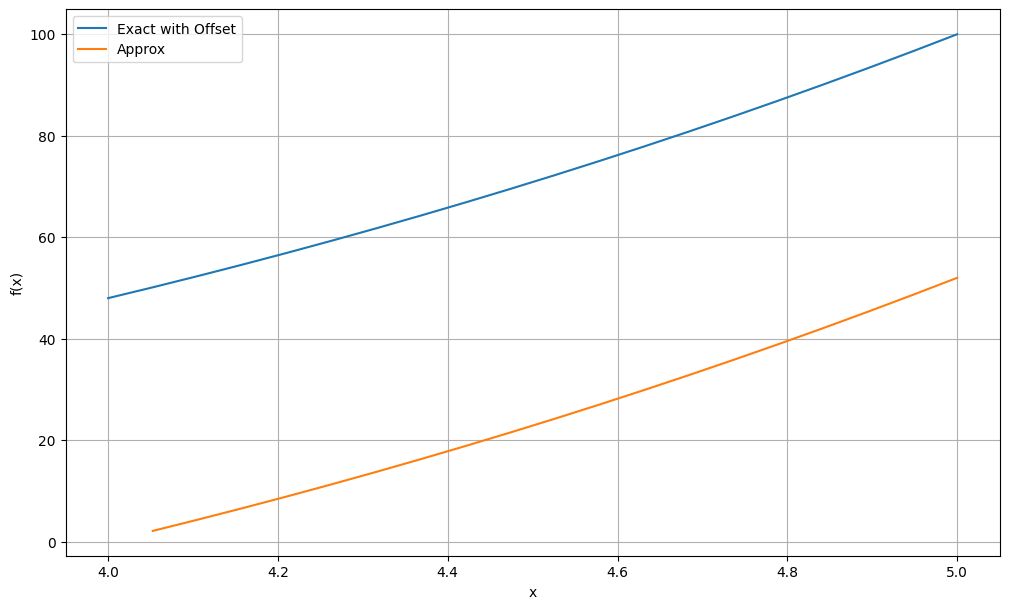

In [ ]:
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt

F_exact = exact_int(x)
F_approx = cumtrapz(func(x), x)

plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approx'])
plt.show()

In [ ]:
# we can also compute the value with quad
from scipy.integrate import quad

I_quad, est_err_quad = quad(func,4,5)
print(I_quad)

52.00000000000001
